### Earth Analytics Bootcamp - Final Project
**Author:** Mark Brown
**Date:** 07/01/2019 

In [1]:
# import nessary python packages
import os
import numpy as np
import pandas as pd
import urllib.request
import matplotlib.pyplot as plt

print("Packages successfully imported")

Packages successfully imported


#### Section 1: Questions 1-10 Using Pandas Dataframes

#### Get Data

Use .urllib.request to download the following .csv file of fires in California and import the data to a pandas dataframe:

1. CA_fires_1992_2015_gt_100_acres.csv from https://ndownloader.figshare.com/files/12835340

The data contains one record for every fire greater than 100 acres that occurred between 1992 and 2015. The dataset has columns for the size of the fire (acres) and for the year and month of the fire, along with other details about the cause, reporting agency, county name, etc.

In [2]:
# change working directory
os.chdir("/Users/markb/earth-analytics-bootcamp/")

# print the current directory
print("The current working directory is:", os.getcwd())

# print space between print statments
print("")

# download the required datset
urllib.request.urlretrieve(url = "https://ndownloader.figshare.com/files/12835340", 
                           filename = "data/CA_fires_1992_2015_gt_100_acres.csv")

# print statment that file succesfully downloaded
print("The file has been successfully downloaded and can be seen in the directory list below:")

# print space between print statments
print("")

# list files in 'data' directory to show that files have successfully downloaded
os.listdir("/Users/markb/earth-analytics-bootcamp/data/")

The current working directory is: C:\Users\markb\earth-analytics-bootcamp

The file has been successfully downloaded and can be seen in the directory list below:



['avg-monthly-precip.txt',
 'avg-precip-months-seasons.csv',
 'avg-temp-months-seasons.csv',
 'boulder-precip-1996-to-2006-months.csv',
 'boulder-precip-2007-to-2017-months-seasons.csv',
 'boulder-temp-2004-to-2009.csv',
 'boulder-temp-2010-to-2014.csv',
 'boulder-temp-2015.txt',
 'boulder-temp-2016.txt',
 'boulder-temp-2017.txt',
 'CA-fires-month-count-1992-to-2015.csv',
 'CA_fires_1992_2015_gt_100_acres.csv',
 'monthly-precip-1988-to-1992.csv',
 'monthly-precip-1993-to-1997.csv',
 'monthly-precip-2002-2013.csv',
 'monthly-precip-mm-1998-to-2017.csv',
 'monthly-temp-2010-to-2013.csv',
 'monthly-temp-2014-to-2017.csv',
 'monthly-temp-cel-1998-to-2017.csv',
 'months.txt',
 'precip-2002-2013-months-seasons.csv',
 'precip_2002_2013.csv',
 'snow-2007-to-2017-months-seasons.csv',
 'snow-2007-to-2017.csv',
 'temp-1991-to-1995-months.csv',
 'temp-1996-to-2000-months.csv']

#### Question 1: Explore Structure of the Pandas Dataframe (2 pts)

Use the appropriate functions to print the first few rows of the pandas dataframe and the last few rows of the dataframe.

Note: as this dataframe contains many records, it is not helpful to print the whole dataframe.

In [3]:
# create new pandas dataframe from the downloaded data

CA_fires_1992_2015_gt_100_acres = pd.read_csv("/Users/markb/earth-analytics-bootcamp/data/CA_fires_1992_2015_gt_100_acres.csv")

# use .head function to print the first few rows of the pandas 
# dataframe

CA_fires_1992_2015_gt_100_acres.head()

,fd_unq_id,source_reporting_unit_name,fire_name,year,month,month_num,cause,fire_size,fire_size_class,state,county
0,1338131,Mendocino Unit,VANN,1992,February,2,Equipment Use,120.0,D,CA,NaN
1,216388,Yuma Field Office,WALTERS,1992,March,3,Debris Burning,1800.0,F,CA,NaN
2,218766,California Desert District,MESA,1992,April,4,Equipment Use,4200.0,F,CA,NaN
3,1373316,CDF - San Bernardino Unit,COLLINS,1992,April,4,Arson,125.0,D,CA,NaN
4,1373321,CDF - San Bernardino Unit,COVINGTON,1992,April,4,Arson,104.0,D,CA,NaN


In [4]:
CA_fires_1992_2015_gt_100_acres.tail()

,fd_unq_id,source_reporting_unit_name,fire_name,year,month,month_num,cause,fire_size,fire_size_class,state,county
4096,300308392,Butte Unit,RICHVALE,2015,October,10,Equipment Use,250.0,D,CA,Butte
4097,300308084,CDF - San Benito-Monterey Unit,CIENEGA,2015,October,10,Miscellaneous,690.0,E,CA,San Benito
4098,300209443,Sequoia And Kings Canyon National Parks,BURNT,2015,October,10,Lightning,161.0,D,CA,NaN
4099,300293910,Colorado River Agency,HIGHWAY,2015,November,11,Missing/Undefined,323.0,E,CA,Riverside
4100,300293894,Ventura County Fire Department,SOLIMAR,2015,December,12,Missing/Undefined,1288.0,F,CA,Ventura


#### Question 2: Summarize Fire Size (4 pts)

Use the appropriate function to calculate summary statistics of only the fire size (acres).

In your Markdown documentation for this question, write a sentence or two stating:

* the mean, minimum, and maximum fire size (acres) in this dataset.
* the total number of fires in this dataset.

Hints:

* It can helpful to determine how to select the data you need first before summarizing it.
* You can also review how to run summary statistics on a specific column in a pandas dataframe.

In [5]:
# select data from 'fire size' column and save to new dataframe

CA_fires_1992_2015_fire_size = CA_fires_1992_2015_gt_100_acres[["fire_size"]]

# run summary statistics on new dataframe
CA_fires_1992_2015_fire_size.describe()

,fire_size
count,4101.000000
mean,2995.314133
std,13481.045403
min,100.100000
25%,180.000000
50%,354.000000
75%,1155.000000
max,315578.800000


* The mean recorded fire size in California from 1992 to 2015 was 2995.3 acres.
* The minimum recorded fire size greater than 100 acres in California from 1992 to 2015 was 100.1 acres
* The maximum recorded fire size in California from 1992 to 2015 was 315578.8 acres
* The total number of records in this dataset is 4101


#### Question 3: Calculate Total Number of Fires For Each Year (4 pts)

Use the appropriate function to calculate the total number of fires per year, and save as a new dataframe.

Note: the displayed data below only shows the first few rows in the dataset.

Hints:

* Review the use of groupby to run statistics on pandas dataframes.
* Think about what value you want to use to group the data and what value you want to use to determine the total number of fires.

In [6]:
# create a new dataframe from groupby calculation of .count on year
CA_fires_per_year = CA_fires_1992_2015_gt_100_acres.groupby(["year"])[["fd_unq_id"]].count()

# print 'CA_fires_per_year'. Use .head to display first few rows only
CA_fires_per_year.head()

,fd_unq_id
year,
1992,237
1993,187
1994,201
1995,189
1996,333


#### Question 4: Reset Index (2 pts)

Use the appropriate function to reset the index of the dataframe created in the previous question, so that the year returns to being a column. Save the reset dataframe as a new dataframe.

Note: the displayed data below only shows the first few rows in the dataset.

In [7]:
# create new dataframe and reset index of month_temp_2010_to_2017_count
CA_fires_per_year_index_reset = CA_fires_per_year.reset_index()

# print new dataframe. Use .head to print only the first few rows
CA_fires_per_year_index_reset.head()

,year,fd_unq_id
0,1992,237
1,1993,187
2,1994,201
3,1995,189
4,1996,333


#### Question 5: Plot Total Number of Fires For Each Year (2 pts)

Create a plot of your choice (i.e. type, color) that displays the total number of fires for each year of data.

Be sure to label your x- and y-axes appropriately and give your plot an appropriate title.

Hint:

* Think about which dataframe you want to use for the plot and what data you need to plot.

The CA_fires_per_year_index_reset dataframe needs to be used as plots can't be created using indexes. Year needs to be the x axis and fd_unq_id needs to be the Y axis.

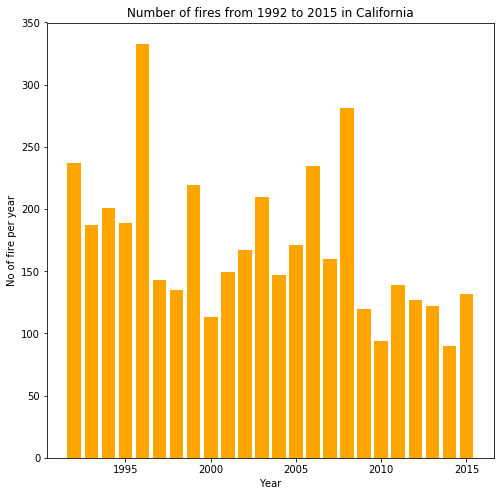

In [8]:
# set plot size for all plots that follow
plt.rcParams["figure.figsize"] = (8, 8)

# create the plot space upon which to plot the data
fig, ax = plt.subplots()

# add the x-axis and the y-axis to the plot
ax.bar(CA_fires_per_year_index_reset.year, CA_fires_per_year_index_reset.fd_unq_id, color="orange")

# set plot title
ax.set(title="Number of fires from 1992 to 2015 in California")

# add labels to the axes
ax.set(xlabel="Year", ylabel="No of fire per year");


#### Question 6: Convert Units For Fire Size (4 pts)

Write a function to convert the units of fire size from acres to hectares (i.e. a standard unit that represents 10,000 square meters). One hectare is equal to 2.47105 acres.

In [9]:
# define function to convert input values from acres to hectares

def acre_to_hectare(x):
    
    # convert values from acres to hectares using Hectare = Acre * 2.47105
    # can take single value, single, value variable, or numpy array as input
    x = x / 2.47105
    
    # returns value converted from Acres to Hectares
    return(x)

#### Question 7: Apply Function to Column (4 pts)

Run the function you created in the previous question to convert the units of the fire size in your pandas dataframe from acres to hectares.

Use the appropriate function to print only the first few rows to display the converted data.

Hint:

* Review how to apply a function to a column in a pandas dataframe.

In [10]:
# replace values in 'fire_size' with the calculated values from
# the applied function 'acre_to_hectare'

CA_fires_1992_2015_gt_100_acres["fire_size"] = CA_fires_1992_2015_gt_100_acres["fire_size"].apply(acre_to_hectare)

# print .head() for dataframe to see the updated values

CA_fires_1992_2015_gt_100_acres.head()

,fd_unq_id,source_reporting_unit_name,fire_name,year,month,month_num,cause,fire_size,fire_size_class,state,county
0,1338131,Mendocino Unit,VANN,1992,February,2,Equipment Use,48.562352,D,CA,NaN
1,216388,Yuma Field Office,WALTERS,1992,March,3,Debris Burning,728.435281,F,CA,NaN
2,218766,California Desert District,MESA,1992,April,4,Equipment Use,1699.682321,F,CA,NaN
3,1373316,CDF - San Bernardino Unit,COLLINS,1992,April,4,Arson,50.585783,D,CA,NaN
4,1373321,CDF - San Bernardino Unit,COVINGTON,1992,April,4,Arson,42.087372,D,CA,NaN


#### Question 8: Calculate Mean Fire Size For Each Year (4 pts)

Use the appropriate function to calculate the mean fire size (in hectares) per year and save as a new dataframe.

Note: the displayed data below only shows the first few rows in the dataset.

Hints:

* Review the use of groupby to run statistics on pandas dataframes.
* Think about what value you want to use to group the data and what value you want to use to determine the mean size of fires.

In [11]:
# create a new dataframe from groupby calculation of mean on fire_size
CA_fires_1992_2015_gt_100_acres_mean = CA_fires_1992_2015_gt_100_acres.groupby(["year"])[["fire_size"]].mean()

# print new dataframe displaying only the first few values
CA_fires_1992_2015_gt_100_acres_mean.head()

,fire_size
year,
1992,461.297265
1993,642.637897
1994,771.721812
1995,417.441164
1996,825.744342


#### Question 9: Plot Mean Fire Size For Each Year (2 pts)

Create a plot of your choice (i.e. type, color) that displays the mean size of fires for each year of data.

Be sure to label your x- and y-axes appropriately and give your plot an appropriate title.

Hint:

* Recall the step you completed in Question 4 to reset the index after the groupby.
* Think about which dataframe you want to use for the plot and what data you need to plot.

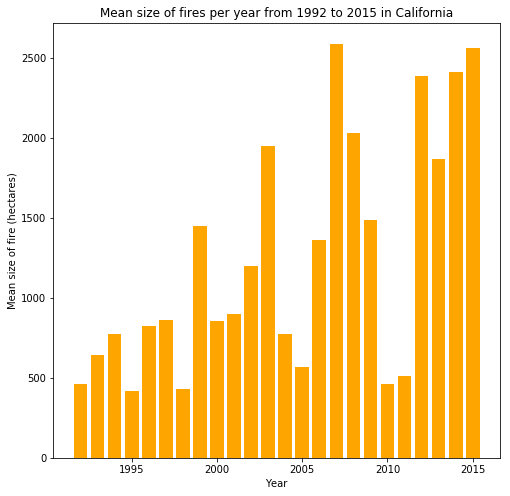

In [12]:
# reset the index of CA_fires_1992_2015_gt_100_acres_mean
CA_fires_1992_2015_gt_100_acres_mean_reset_index = CA_fires_1992_2015_gt_100_acres_mean.reset_index()

# set plot size for all plots that follow
plt.rcParams["figure.figsize"] = (8, 8)

# create the plot space upon which to plot the data
fig, ax = plt.subplots()

# add the x-axis and the y-axis to the plot
ax.bar(CA_fires_1992_2015_gt_100_acres_mean_reset_index.year, CA_fires_1992_2015_gt_100_acres_mean_reset_index.fire_size, color="orange")

# set plot title
ax.set(title="Mean size of fires per year from 1992 to 2015 in California")

# add labels to the axes
ax.set(xlabel="Year", ylabel="Mean size of fire (hectares)");


#### Question 10: Discuss Results (4 pts)

Write a few sentences (2-3) on each of the following:

1. Do the number of fires appear to be increasing over time in California? Explain and support your answer using your plot of total number of fires per year.

2. Does the average size of fires appear to be increasing over time in California? Explain and support your answer using your plot of mean size of fires per year.

3. Which result (i.e. total number of fires or mean fire size per year) do you think provides a more appropriate measure of fire danger in California?

#### Answers to Question 10

1. There seems to be no significant increase in the number of fires in California over time. In fact looking at the plot there appears to be a slight downward trend in the number of fires. Further analysis would need to be carried out to confirm if this is statistically significant.
2. There does seem to be a marked increase in the average size of fires over time. Looking at the plot the average size of fires increases significantly from the decade of 1995 to 2005 to the decase of 2005 to 2015. Further analysis would need to be carried out to confirm if this is statistically significant.
3. I would say that the increased mean size of fire would provide a more appropriate measure of fire danger in California. Bigger fires are more dangerous to life and properties than smaller fires and are harder for emergency services to contain, e.g as witnessed in the camp fires in 2018.

#### Section 2: Questions 11-19 Using Numpy Arrays
**Get Data**

Use .urllib.request to download the following .csv file of the number of fires by month and year in California and import the data to numpy arrays:

1. CA-fires-month-count-1992-to-2015.csv from https://ndownloader.figshare.com/files/12835346

The dataset contains a row for each year specified in the dataset name and contains a column for each month (starting with January through December). The values represent the number of fires that occurred in that month and year, based on fires greater than 100 acres that occurred between 1992 and 2015.

In [13]:
# change working directory
os.chdir("/Users/markb/earth-analytics-bootcamp/")

# print the current directory
print("The current working directory is:", os.getcwd())

# print space between print statments
print("")

# download .csv file with data containing the number of fires by
# month and year in California

urllib.request.urlretrieve(url = "https://ndownloader.figshare.com/files/12835346", 
                           filename = "data/CA-fires-month-count-1992-to-2015.csv")

# print statment that file succesfully downloaded
print("The file has been successfully downloaded and can be seen in the directory list below:")

# print space between print statments
print("")

# list files in 'data' directory to show that files have successfully downloaded
os.listdir("/Users/markb/earth-analytics-bootcamp/data/")

The current working directory is: C:\Users\markb\earth-analytics-bootcamp

The file has been successfully downloaded and can be seen in the directory list below:



['avg-monthly-precip.txt',
 'avg-precip-months-seasons.csv',
 'avg-temp-months-seasons.csv',
 'boulder-precip-1996-to-2006-months.csv',
 'boulder-precip-2007-to-2017-months-seasons.csv',
 'boulder-temp-2004-to-2009.csv',
 'boulder-temp-2010-to-2014.csv',
 'boulder-temp-2015.txt',
 'boulder-temp-2016.txt',
 'boulder-temp-2017.txt',
 'CA-fires-month-count-1992-to-2015.csv',
 'CA_fires_1992_2015_gt_100_acres.csv',
 'monthly-precip-1988-to-1992.csv',
 'monthly-precip-1993-to-1997.csv',
 'monthly-precip-2002-2013.csv',
 'monthly-precip-mm-1998-to-2017.csv',
 'monthly-temp-2010-to-2013.csv',
 'monthly-temp-2014-to-2017.csv',
 'monthly-temp-cel-1998-to-2017.csv',
 'months.txt',
 'precip-2002-2013-months-seasons.csv',
 'precip_2002_2013.csv',
 'snow-2007-to-2017-months-seasons.csv',
 'snow-2007-to-2017.csv',
 'temp-1991-to-1995-months.csv',
 'temp-1996-to-2000-months.csv']

In [14]:
# import data into a new numpy array
CA_fires_month_count_1992_to_2015 = np.loadtxt(fname = "/Users/markb/earth-analytics-bootcamp/data/CA-fires-month-count-1992-to-2015.csv", delimiter = ",")

# print the new numpy array
CA_fires_month_count_1992_to_2015

array([[  0.,   1.,   1.,   5.,  23.,  55.,  42.,  66.,  34.,   6.,   4.,
          0.],
       [  0.,   0.,   0.,   2.,  27.,  44.,  33.,  30.,  23.,  17.,   9.,
          2.],
       [  2.,   0.,   0.,   6.,   8.,  50.,  48.,  55.,  23.,   8.,   0.,
          1.],
       [  0.,   1.,   0.,   0.,  11.,  25.,  53.,  35.,  25.,  25.,  11.,
          3.],
       [  2.,   0.,   1.,  15.,  39.,  64.,  64.,  93.,  25.,  26.,   3.,
          1.],
       [  0.,   0.,   5.,   7.,  28.,  13.,  29.,  28.,  25.,   7.,   1.,
          0.],
       [  0.,   0.,   0.,   2.,   2.,  12.,  33.,  47.,  16.,  14.,   5.,
          4.],
       [  0.,   2.,   2.,   3.,   7.,  19.,  33.,  89.,  37.,  22.,   3.,
          2.],
       [  0.,   0.,   3.,   3.,   5.,  19.,  31.,  22.,  17.,  10.,   0.,
          3.],
       [  2.,   1.,   1.,   0.,  13.,  37.,  30.,  40.,  14.,   7.,   3.,
          1.],
       [  0.,   4.,   7.,   3.,  19.,  42.,  34.,  21.,  20.,   6.,  11.,
          0.],
       [  3.,   1.,  

#### Question 11: Write Function to Calculate Sum Across Columns (4 pts)

Write a **function** that calculates the sum across columns of a numpy array.

Hints:
* Recall which existing numpy function you can use to calculate a sum. You will include this function within the function you write to answer this question.
* Review the lessons on functions to review the use of axes to calculate a statistic across the rows or columns of a numpy array.

In [15]:
# define function to calculate the sum across columns of numpy array

def sum_columns(array):
    
    # calculates sum of two-dimensional numpy array for each rpw
    # function can take a numpy array as input
    # function can not take list of pandas dataframe as input
    
    stat_sum_columns = np.sum(array, axis = 0)
    return(stat_sum_columns)

#### Question 12: Execute Function to Calculate Sum Across Columns (2 pts)

Run the function created in the previous question (i.e. to calculate sum across columns in a numpy array) on the numpy array you created for CA-fires-month-count-1992-to-2015.csv. Save the output to a new numpy array.

In [16]:
# execute 'sum_columns' function on 'CA_fires_month_count_1992_to_2015' numpy array

no_of_fires_per_month = sum_columns(CA_fires_month_count_1992_to_2015)

# print new dataframe
no_of_fires_per_month

array([ 21.,  22.,  36.,  89., 338., 816., 968., 909., 521., 275.,  82.,
        24.])

#### Question 13: Write Function to Calculate Sum Across Rows (4 pts)

Write a **function** that calculates the sum across rows of a numpy array.

Hints:
* Recall which existing numpy function you can use to calculate a sum. You will include this function within the function you write to answer this question.
* Review the lessons on functions to review the use of axes to calculate a statistic across the rows or columns of a numpy array.

In [17]:
# define function to calculate the sum across rows of numpy array

def sum_rows(array):
    
    # calculates sum of two-dimensional numpy array for each rpw
    # function can take a numpy array as input
    # function can not take list of pandas dataframe as input
    
    stat_sum_rows = np.sum(array, axis = 1)
    return(stat_sum_rows)

#### Question 14: Execute Function to Calculate Sum Across Rows (2 pts)

Run the function created in the previous question (i.e. to calculate sum across rows in a numpy array) on the numpy array you created for CA-fires-month-count-1992-to-2015.csv. Save the output to a new numpy array.

In [18]:
# execute 'sum_rows' function on 'CA_fires_month_count_1992_to_2015' numpy array

no_of_fires_per_year = sum_rows(CA_fires_month_count_1992_to_2015)

# print new dataframe
no_of_fires_per_year

array([237., 187., 201., 189., 333., 143., 135., 219., 113., 149., 167.,
       210., 147., 171., 235., 160., 281., 120.,  94., 139., 127., 122.,
        90., 132.])

#### Question 15: Create Manual Numpy Array (2 pts)

Manually create a numpy array that contains the month names for January to December and print the values in this new numpy array.

Hints:
* Review the practice activity on data structures to review how to create a numpy array manually.
* Think about the values that are going into this array: are the values text strings or numeric values?

In [19]:
# create new numpy array of months
months = np.array(["Jan", 
                  "Feb", 
                  "Mar", 
                  "Apr", 
                  "May",
                  "June",
                  "July",
                  "Aug", 
                  "Sept", 
                  "Oct", 
                  "Nov", 
                  "Dec"])
# print 'months'
print(months)

['Jan' 'Feb' 'Mar' 'Apr' 'May' 'June' 'July' 'Aug' 'Sept' 'Oct' 'Nov'
 'Dec']


#### Question 16: Check Dimensions of Numpy Arrays (4 pts)

Write one conditional statement that checks that the dimensions (i.e. shape) are the same between:

1. the numpy array for the sum across columns and the numpy array containing the month names 

**AND**

2. the numpy array for the sum across rows and the numpy array containing the month names

Within your conditional statement, print a message stating whether or not both of these conditions are true.

**Hint:**

* Compare the shape of the arrays, rather than the single value for the dimension.
* Recall the operator to check equality between two values.
* Review how to write a conditional statement that checks for two conditions.

In [20]:
# check whether numpy dimensions are the same 

if no_of_fires_per_month.shape == months.shape and no_of_fires_per_year.shape == months.shape:
    print("The dimensions of all the arrays are the same")
    
else:
    print("The dimensions of all the arrays are not the same")

The dimensions of all the arrays are not the same


In [21]:
# supplmentary work to check question. The dimensions between the
# datasets are the same. Not sure I understand the question fully.

print("Number of fires per month dimension:", no_of_fires_per_month.ndim)
print("")
print("Months dimension:", months.ndim)
print("")
print("Number of fires per year dimension:", no_of_fires_per_year.ndim)

Number of fires per month dimension: 1

Months dimension: 1

Number of fires per year dimension: 1


#### Question 17: Plot Numpy Array (6 pts)

Imagine that you have been asked to write a short article for the public on the fire season (i.e. the range of time within a year in which fire is most likely to occur) in California.

Review the data in your summarized numpy arrays (i.e. sum of columns and sum of rows), and choose the one of these arrays to create to represent the fire season in California.

For your chosen array, create a plot of your choice (i.e. type, color). Be sure to label your x- and y-axes appropriately and to give your plots the approriate titles.

In your Markdown documentation, write a few sentences (1-2) to answer each of the following:

* Q1. What do the values in each of these numpy arrays (i.e. the one for sum of columns and the one for sum of rows) represent?

* A1. The numpy array for sum of columns represents the total number of fire in each month from 1992 to 2015. The array for sum of rows represents the total no of fires in each yeat from 1992 to 2015

 

* Q2. Why did you choose the array that you plotted to represent the fire season in California?

* A2. I choose the array below as a season is represented by the months that it falls over.

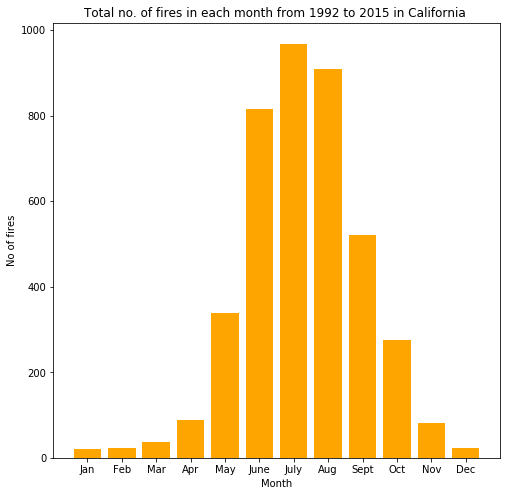

In [22]:
# set plot size for all plots that follow
plt.rcParams["figure.figsize"] = (8, 8)

# create the plot space upon which to plot the data
fig, ax = plt.subplots()

# add the x-axis and the y-axis to the plot
ax.bar(months, no_of_fires_per_month, color="orange")

# set plot title
ax.set(title="Total no. of fires in each month from 1992 to 2015 in California ")

# add labels to the axes
ax.set(xlabel="Month", ylabel="No of fires");


#### Question 18: Discuss Results (6 pts)

Write a few sentences (1-2) on each of the following:

* Q1. Based on the data you have analyzed, how would you define the fire season (i.e. the range of time within a year in which fire is most likely to occur) in California?

* A1. The fire season in California is from May to October.

* Q2. How could you modify your workflow to examine whether the fire season was expanding over time? Think about how the data is organized and how you could split it up to look at how the fire season was changing over time.

* A2. I would use indexing a create a while loop to create a graph for each of the years according to the index number of the row, i.e 0, 1, 2, 3, etc This would then print out a graph for each year.

#### Question 19: Discuss Pandas Dataframes vs Numpy Arrays (6 pts)

In the numpy array section, you calculate the sum across columns. Write a short paragraph (3-4 sentences and include a list if desired) on the following:

* Q1. How could you have analyzed the pandas dataframe to get the same values? Outline a pandas dataframe workflow to arrive at the same values.

Hint: think about the data provided in the original numpy array - do you have similar information in the pandas dataframe?

* A1. You would have to calculate the number of fires per month for each year. Can you use some sort of multiple group on to take into account both year and month? One way to do it might be to create a new column and concatenate both month and year and use that in the groupby using the .count function

#### Section 3 - Option A: Questions 20-24 Using Pandas Dataframes

To answer these questions, use the same pandas dataframe that you previously imported from CA_fires_1992_2015_gt_100_acres.csv.

#### Question 20: Calculate Number of Fires By County (4 pts)

Use the appropriate function to calculate the total number of fires per county and save as a new dataframe.

Note: the displayed data below only shows the first few rows in the dataset.

Hints:

* Review the use of groupby to run statistics on pandas dataframes.
* Think about what value you want to use to group the data and what value you want to use to determine the total number of fires.

In [23]:
# create a new dataframe from groupby calculation of .count on county
CA_fires_per_county = CA_fires_1992_2015_gt_100_acres.groupby(["county"])[["fd_unq_id"]].count()

# print 'CA_fires_per_year'. Use .head to display first few rows only
CA_fires_per_county.head()

,fd_unq_id
county,
Alameda,7
Alpine,5
Amador,3
Butte,35
Calaveras,13


#### Question 21: Determine Top 5 Counties for Number of Fires (4 pts)

Sort your pandas dataframe from the previous question, so that you can determine the top five counties that have experienced the most fires.

Note: the displayed data below only shows the first few rows in the sorted dataset.

In your Markdown documentation, answer the following question:

1. In what part of California are these counties? It can help to look at a map of the counties in California. - Answer- Most of the counties are in the south.

In [24]:
# sort the values in descending order to find the maximum value in dataframe
# display on the first few values using .head
CA_fires_per_county.sort_values(by="fd_unq_id", ascending = False).head()


,fd_unq_id
county,
Kern,91
San Diego,85
Riverside,80
San Bernardino,65
Los Angeles,63


#### Question 22: Calculate Mean Size of Fire By County (4 pts)

Use the appropriate function to calculate the mean size of fires (in hectares) per county and save as a new dataframe.

Note: the displayed data below only shows the first few rows in the dataset.

Hints:
* Review the use of groupby to run statistics on pandas dataframes.
* Think about what value you want to use to group the data and what value you want to use to determine the mean size of fires.

In [25]:
# create a new dataframe from groupby calculation of .mean on county
CA_fires_per_county = CA_fires_1992_2015_gt_100_acres.groupby(["county"])[["fire_size"]].mean()

# print 'CA_fires_per_year'. Use .head to display first few rows only
CA_fires_per_county.head()

,fire_size
county,
Alameda,130.308978
Alpine,1645.292487
Amador,2342.189218
Butte,495.625052
Calaveras,102.914831


#### Question 23: Select Data for Top 3 Counties for Mean Size of Fire and Create New Dataframes (4 pts)

Sort your pandas dataframe from the previous question, so that you can determine the top three counties ranked in terms of largest mean fire size.

Note: the displayed data below only shows the first few rows in the sorted dataset.

For each of these counties, select all of its data from the original pandas dataframe from CA_fires_1992_2015_gt_100_acres.csv, and save each county to a new dataframe.

In [26]:
# sort the values in descending order to find the maximum value in dataframe
# display on the first few values using .head
CA_fires_per_county.sort_values(by="fire_size", ascending = False).head()

,fire_size
county,
Ventura,12521.038065
Santa Clara,8244.673317
Santa Barbara,6758.735725
Monterey,5522.676402
Tuolumne,4448.036260


In [27]:
# select rows that has a value of `Ventura` in `county` column
ventura_fires_1992_to_2015 = CA_fires_1992_2015_gt_100_acres[CA_fires_1992_2015_gt_100_acres.county == "Ventura"]

# print new dataframe using .head to print only the first few columns
ventura_fires_1992_to_2015.head()

,fd_unq_id,source_reporting_unit_name,fire_name,year,month,month_num,cause,fire_size,fire_size_class,state,county
2265,1301190,Ventura County Fire Department,SIMI INCIDENT,2003,October,10,Missing/Undefined,43788.672831,G,CA,Ventura
2597,15001173,Cal state responsibility area (SRA) in Ventura...,SCHOOL,2005,November,11,Missing/Undefined,1574.634265,F,CA,Ventura
2807,14907,Los Padres National Forest,DAY,2006,September,9,Debris Burning,65843.265009,G,CA,Ventura
3328,38069,Los Padres National Forest,SULPHUR,2009,July,7,Miscellaneous,138.807390,E,CA,Ventura
3355,39373,Los Padres National Forest,VINTAGE,2009,August,8,Miscellaneous,60.702940,D,CA,Ventura


In [28]:
# select rows that has a value of `Santa Clara` in `county` column
santa_clara_fires_1992_to_2015 = CA_fires_1992_2015_gt_100_acres[CA_fires_1992_2015_gt_100_acres.county == "Santa Clara"]

# print new dataframe using .head to print only the first few columns
santa_clara_fires_1992_to_2015.head()

,fd_unq_id,source_reporting_unit_name,fire_name,year,month,month_num,cause,fire_size,fire_size_class,state,county
2040,316842,Bakersfield District,CROY,2002,September,9,Equipment Use,1265.453957,F,CA,Santa Clara
2185,1301084,Santa Clara Unit,SANTA CLARA COMPLEX,2003,August,8,Lightning,12209.384675,G,CA,Santa Clara
2337,15000800,Santa Clara Unit,SILVER,2004,July,7,Missing/Undefined,176.038526,E,CA,Santa Clara
2965,319992,Bakersfield District,LICK,2007,September,9,Campfire,19327.816111,G,CA,Santa Clara


In [29]:
# select rows that has a value of `Santa Barbara` in `county` column
santa_barbara_fires_1992_to_2015 = CA_fires_1992_2015_gt_100_acres[CA_fires_1992_2015_gt_100_acres.county == "Santa Barbara"]

# print new dataframe using .head to print only the first few columns
santa_barbara_fires_1992_to_2015.head()

,fd_unq_id,source_reporting_unit_name,fire_name,year,month,month_num,cause,fire_size,fire_size_class,state,county
1942,1301196,Los Padres National Forest,SUDDEN RANCH,2002,June,6,Missing/Undefined,3149.268530,G,CA,Santa Barbara
2336,15000799,Santa Barbara County Fire Department,JALAMA,2004,July,7,Missing/Undefined,124.238684,E,CA,Santa Barbara
2642,15173,Los Padres National Forest,PERKINS,2006,June,6,Miscellaneous,6065.437769,G,CA,Santa Barbara
2706,13918,Los Padres National Forest,BALD,2006,July,7,Lightning,505.857834,F,CA,Santa Barbara
2778,14425,Los Padres National Forest,RANCHO 2,2006,August,8,Equipment Use,73.652901,D,CA,Santa Barbara


#### Question 24: Loop to Describe Fire Size in Selected Counties (4 pts)

Write a loop that executes the appropriate function to calculate summary statistics of only the fire size (acres) for each of the three counties identified in the previous question.

In your Markdown documentation for this question, write a sentence or two stating:

* the total number of fires for each county.

Hints:

* Review your code from Question 2.
* Recall that creating a list of items to iterate upon is a good first step to writing a loop.
* Think about what you are iterating upon in this question - do your list values need "" to indicate text strings, or are you iterating on existing variables?

**I figured out two different ways to achieve this. See below**

* The total number of fires above 100ha for Ventura from 1992 to 2015 was 9.
* The total number of fires above 100ha for Santa Clara from 1992 to 2015 was 4.
* The total number of fires above 100ha for Santa Barbara from 1992 to 2015 was 23.

The values are dataframe that are an existing variable so text strings aren't needed.

In [30]:
# create a list containing the dataframes on which to carry out
# the iteration

df_list = [ventura_fires_1992_to_2015, santa_clara_fires_1992_to_2015, santa_barbara_fires_1992_to_2015]

for df in df_list:
    
    # select data in dataframe from 'fire_size' and run describe function
    df = df[["fire_size"]].describe()
    
    # print results of describe function
    print(df)
    print("")

          fire_size
count      9.000000
mean   12521.038065
std    24608.933755
min       60.702940
25%      138.807390
50%      369.073875
75%     1574.634265
max    65843.265009

          fire_size
count      4.000000
mean    8244.673317
std     9171.829345
min      176.038526
25%      993.100099
50%     6737.419316
75%    13988.992534
max    19327.816111

          fire_size
count     23.000000
mean    6758.735725
std    21159.110420
min       62.726371
25%      132.939439
50%      255.761721
75%     1976.083042
max    97208.474130



In [32]:
# test to run summary statistics on one dataframe

# select data from 'fire size' column and save to new dataframe

ventura_fires_1992_to_2015_fire_size = ventura_fires_1992_to_2015[["fire_size"]]

# run summary statistics on new dataframe
ventura_fires_1992_to_2015_fire_size.describe()

,fire_size
count,9.000000
mean,12521.038065
std,24608.933755
min,60.702940
25%,138.807390
50%,369.073875
75%,1574.634265
max,65843.265009


In [33]:
# this is an alternative way to write the loop
# create a list containing the dataframes on which to carry out
# the iteration

df_list = [ventura_fires_1992_to_2015, santa_clara_fires_1992_to_2015, santa_barbara_fires_1992_to_2015]

for df in df_list:
    df = df[["fire_size"]]
    print(df.describe())
    print("")

          fire_size
count      9.000000
mean   12521.038065
std    24608.933755
min       60.702940
25%      138.807390
50%      369.073875
75%     1574.634265
max    65843.265009

          fire_size
count      4.000000
mean    8244.673317
std     9171.829345
min      176.038526
25%      993.100099
50%     6737.419316
75%    13988.992534
max    19327.816111

          fire_size
count     23.000000
mean    6758.735725
std    21159.110420
min       62.726371
25%      132.939439
50%      255.761721
75%     1976.083042
max    97208.474130

